Osnabrück University - Computer Vision (Winter Term 2016/17) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack

# Exercise Sheet 08: Template Matching and Pattern Recognition

## Introduction

This week's sheet should be solved and handed in before the end of **Sunday, January 22, 2017**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (Covariance) [0 Points]

This exercise is supposed to be very easy, does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What does *covariance* express?

The value of the product of two variates from their respective means.

**b)** Provide a formula to compute the covariance of two 1-dimensional datasets. How can it be generalized to the $n$-dimensional case?

**c)** Create and plot two (1-dimensional) datasets with high covariance. Then do the same for two two datasets with low covariance.

## Exercise 1 (Template Matching – 8p)

**a)** Explain in your own words the idea of *template matching*. Is it a data or model based approach? What are the advantages and disadvantages? In what situations would you apply template matching?

**b)** Explain the ideas of *mean absolute difference* and *correlation coefficient*? Name pros and cons.

**c)** Where is Waldo? In the two images `wheresWaldo1.jpg` and `wheresWaldo2.jpg`, Waldo is hiding in the midst of
a busy crowd. He always wears the same red and white striped sweater and hat. However, he
may be carrying a something that varies from scene to scene.
Use template matching with the given Waldo templates (`Waldo.zip`) to locate Waldo. Highlight
Waldo in the scene and indicate which template was matched.

(2340, 1700) (130, 109)
(2340, 1700) (186, 106)
(2340, 1700) (134, 77)
(2340, 1700) (162, 79)
(2340, 1700) (181, 104)
(2340, 1700) (768, 361)
(2340, 1700) (130, 109)
(2340, 1700) (186, 106)
(2340, 1700) (134, 77)
(2340, 1700) (162, 79)
(2340, 1700) (181, 104)
(2340, 1700) (768, 361)


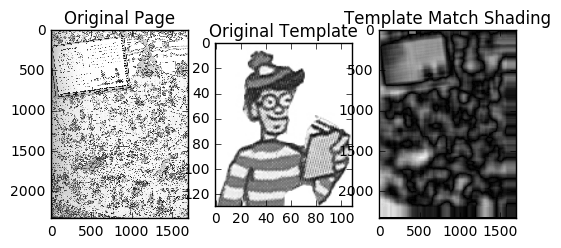

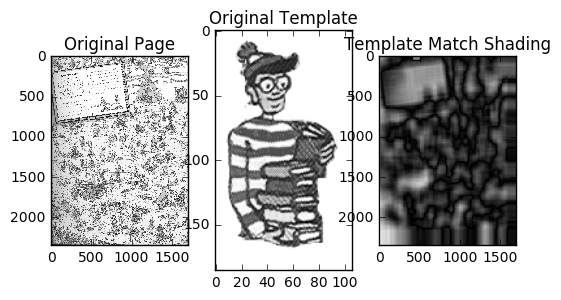

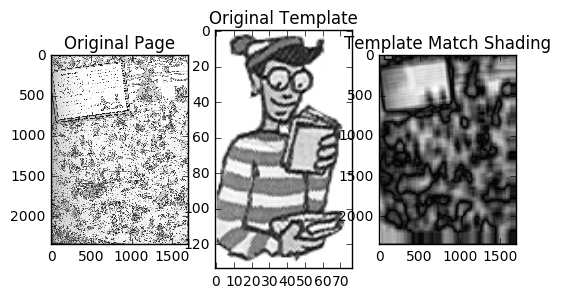

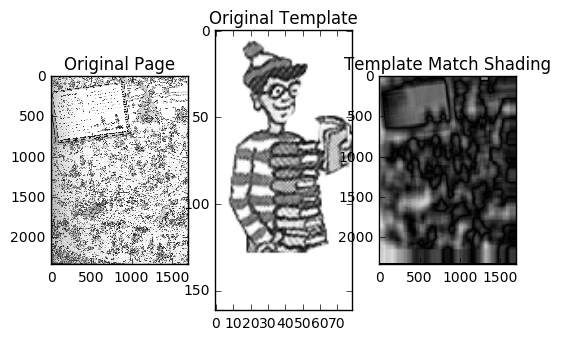

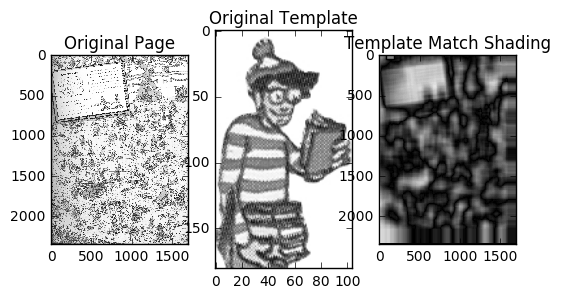

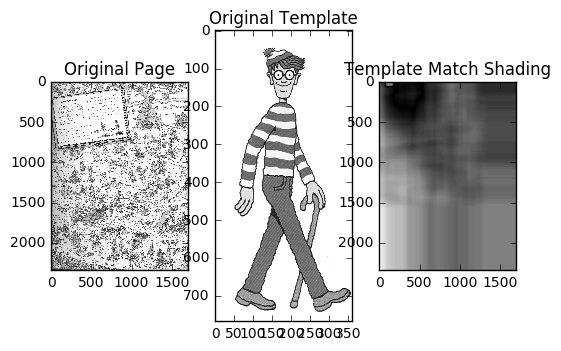

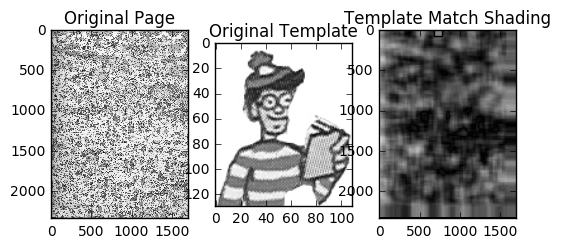

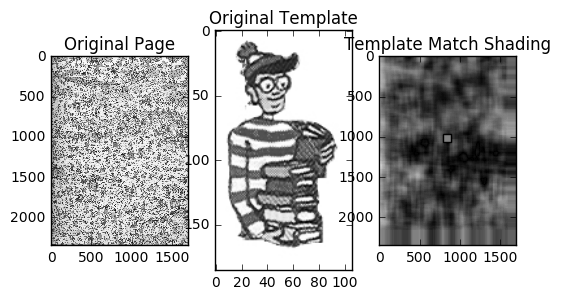

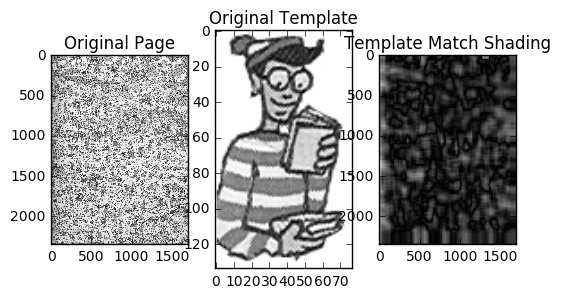

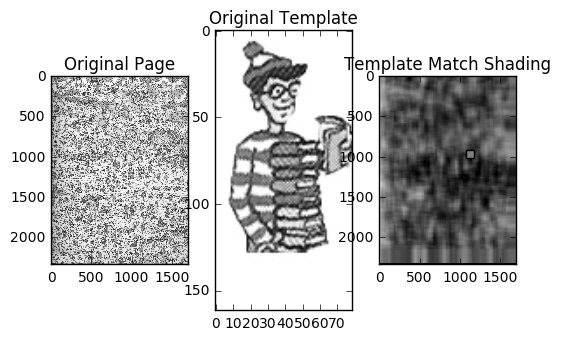

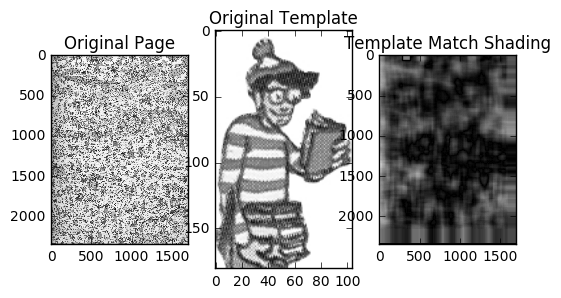

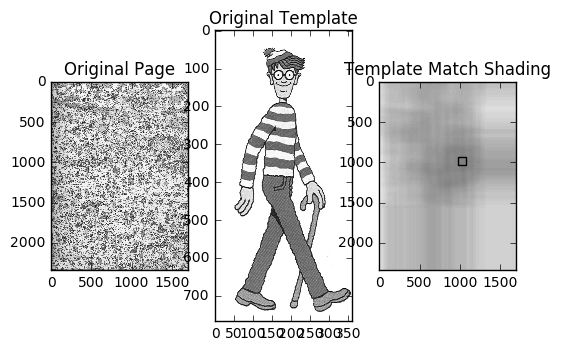

In [2]:
import numpy as np
from scipy import misc
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

pages = {}
for filename in os.listdir('waldo'):
    if filename.startswith('wheres'):
        pages[filename.split('.')[0]] = misc.imread('waldo/' + filename, flatten=True)
        
waldos = {}
for filename in os.listdir('waldo'):
    if filename.startswith('waldo'):
        waldos[filename.split('.')[0]] = misc.imread('waldo/' + filename, flatten=True)

def match_template(img, template):
    template_cols = template.shape[1]
    template_rows = template.shape[0]
    template_vec = np.ravel(template)
    shading = np.zeros(img.shape)
    mindist = 1000.
    idx = (-1,-1)
    pixelNumber = template.shape[0] * template.shape[1]
    templateMean = np.sum(template) // pixelNumber
    shading[0:template.shape[0],0:template.shape[1]] = 1
    print (img.shape,template.shape)
    guessLocation = (-1,-1)
    min_diff = float('inf')
    for rowInd, row in enumerate(img):
        if rowInd + template_rows:
            break
        for colInd, pixel in enumerate(row):
            if colInd + template_cols:
                break
            img_patch = img[rowInd:rowInd + template_rows, colInd:colInd + template_cols]
            img_vec = np.ravel(img_patch)
            dist = np.sum(np.abs(template_vec-img_vec))
            if(dist==0.0):
                print("Found excact match!")
                return rowInd, colInd
            if dist<min_dist:
                min_dist = dist
#                 row_loc
            imgMean = np.sum(img[rowInd:rowInd+template.shape[0],colInd:colInd+template.shape[1]]) // pixelNumber 
            diff = np.sqrt(np.sum(np.square(templateMean- imgMean)))
            shading[rowInd:rowInd+template.shape[0],colInd:colInd+template.shape[1]] = diff
            if diff < minDiff:
                min_diff = diff
                guessLocation = (colInd,rowInd)
    plt.figure()
    plt.subplot(1,3,1)
    plt.title('Original Page')
    plt.imshow(img)
    plt.subplot(1,3,2)
    plt.title('Original Template')
    plt.imshow(template)
    plt.subplot(1,3,3)
    plt.title('Template Match Shading')
    currentAxis = plt.gca()
    currentAxis.add_patch(Rectangle((guessLocation[0] - 50, guessLocation[1] - 50), 100, 100, facecolor="gray"))
    plt.imshow(shading)        

plt.gray()
for pageName, page in pages.items():
    for waldoName, template in waldos.items():
        match_template(page,template)        
plt.show()

## Exercise 2 (Pattern Recognition – 6p)

**a)** What are the goals of *pattern recognition*? How can they be achieved? What are the problems?

**b)** What is *principal component analysis*? How is it related to pattern recognition?

**c)** Explain how principal components can be computed? Then implement a function that performs the computation.

In [1]:
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
from scipy import misc
from scipy import sparse

def autocorr(x):
        result = np.correlate(x, x, mode='full')
        return result[result.size/2:]

def pca(data):
    """
    Perform principal component analysis.
    
    Arguments:
        data - an k*n dimensional array (k entries with n dimensions)
        
    Results:
        pc - an array holding the principal components
    """
    
    # computing eigenvalues and eigenvectors of covariance matrix
    M = (data-np.mean(data.T,axis=1)).T #gets the autocorrelation matrix for a matrix, np.correlate only works for arrays
    eigenval, pc = np.linalg.eig(np.cov(M)) #computes the eigenvalues and eigenvectors
    #score = np.dot(pc.T,M) #project the data onto the new space using the dot product
    #return pc,score,values
    
    return pc

testData = np.ones((2,3))
test = pca(testData)
print(test)

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


## Exercise 3 (Eigenfaces – 6p)

**a)** Import the images in `trainimgs.zip` into an numpy array using the function `read_images_from_directory` provided in the cell below. Then use PCA to compute the eigenfaces (i.e. the eigenvectors of the face images). You may use your PCA function from Exercise 2 or some build in function. Explain what kind of input PCA expects, and how that fits to our images (you may have to `reshape` the images!).
Finally, display the eigenfaces.

In [ ]:
import sys
import os
import glob
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt


def read_images_from_directory(directory,suffix,shape):
    """
    Read all images found in DIRECTORY with given file
    name SUFFIX. All images should have the same SHAPE,
    specified as (rows,columns).
    
    Returns:
        images: A numpy array of shape m*rows*columns (from shape)
        names: A list of corresponding image names.
    """
    
    # initialize the image array and name list
    images = np.empty((0, *shape))
    names = []

    # now loop through all image files in the directory
    for file_name in glob.glob(directory + '/*.' + suffix):
        if os.path.isfile(file_name):

            # load each image (as double)
            img = misc.imread(file_name, mode = 'F')
            
            # check for correct size
            if img.shape == shape:
                images = np.append(images,img.reshape((1,*shape)),axis=0)
                names.append(os.path.basename(file_name))
            else:
                print('warning: Image "' + file_name + '" with wrong size will be ignored!', file=sys.stderr)
        
    return images, names


img_shape = (192 ,168);
train_imgs, train_names = read_images_from_directory('trainimg', 'pgm', img_shape)

# FIXME: put your code here!


**b)** Now project the training face images into the eigenspace to calculate their ”feature vectors”,
i.e. a representation with significantly lower dimension. For the projection of the face images,
they have to be centered first, i.e. the mean face vector has to be subtracted. Store the representation achieved in this way in some array (`face_db`). Then implement the function `recognize_face` that recognizes a face from that database by calculate the euclidean distance of this face feature vector to all of the training feature vectors from the database. The feature vector with the
smallest distance represents the winner category. Display the input image and the winner
image (image corresponding to the winner feature vector) beside each other to check the
correctness of your implementation.


In [ ]:
def recognize_face(face, eigenfaces, mean_face, face_db)
    """
    Recognize a face from a face database.
    and return the index of the best matching database entry.

    The FACE is first centered and projected into the eigeface
    space provided by EIGENFACES. Then the best match is found
    according to the euclidean distance in the eigenface space.
    """
    index = -1
    
    # FIXME: put your code here!

    return index




**c)** Now classify the images in `testimg.zip`. Try to reduce the number of principal components
used. How many PCs are necessary to still achieve perfect classification?

In [ ]:
# FIXME: put your code here!
